In [82]:
#import required libraries
import pandas as pd
import string
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [83]:
#set col width to 100
pd.set_option('display.max_colwidth', 100)

#stop word removal
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
from nltk.tokenize import word_tokenize

#Importing the excel file
excel_file= 'Management Strategy-Data relevant.xlsx'
strategy_rel = pd.read_excel(excel_file)
strategy_rel = strategy_rel[['Sentences']]
strategy_rel['label'] = 1

excel_file1= 'Management Strategy-Data Not relevant.xlsx'
strategy_notrel = pd.read_excel(excel_file1)
strategy_notrel = strategy_notrel[['Sentences']]
strategy_notrel['label'] = 0

strategy_final = pd.concat([strategy_rel,strategy_notrel])

#get the size of dataset
print(strategy_final.shape)
strategy_final.head()

(3232, 2)


,Sentences,label
0,$5 million of the milestones are tied to Natera's support activities and the balance of the mile...,1
1,", growth is expected to remain elevated in 2018, driven by the increased pace of global trade. I...",1
2,", the UK and Canada. The remainder of our investments will be directed at strategic initiatives....",1
3,"... question is for you both for of the strategic initiative slides, you stress focus on opera...",1
4,"\\"" Sustainability continues to be an increasingly important part of our success. Our sustainabi...",1


In [84]:
#remove numeric values from dataset
strategy_final['Sentences'] = strategy_final['Sentences'].str.replace('\d+', '')

In [85]:
#add words that aren't in the NLTK stopwords list
new_stopwords = ['included','including','includes','one','two','three','general','generally','way','better','need','really','believe','provide','say','saying','says','include','said','also','would','could','end','recent','recently','us','like','make','may','look','still','come','see','across','even','much','get','allow','allows','allowed','allowing','well','go','gone','going','that','thats','take','thing','come','move','give','help','put','dont','people','got','kind','know','day','think','continue','look','year','years','new','use','there','want','wanted','please']
new_stopwords_list = stopwords.extend(new_stopwords)

In [86]:
#data cleaning- removing punctuations, tokenize, stop words
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = set([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [87]:
#Split into train/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(strategy_final[['Sentences']], strategy_final['label'], test_size=0.25)

In [88]:
#Normalization technique using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text, max_features=500, min_df = 3, max_df = 0.7)
tfidf_vect_fit = tfidf_vect.fit(X_train['Sentences'])

tfidf_train = tfidf_vect_fit.transform(X_train['Sentences'])
tfidf_test = tfidf_vect_fit.transform(X_test['Sentences'])

X_train_vect = pd.DataFrame(tfidf_train.toarray())
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.242672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
print(tfidf_vect.get_feature_names())

['abil', 'abl', 'acceler', 'access', 'account', 'achiev', 'acquir', 'acquisit', 'action', 'activ', 'actual', 'ad', 'add', 'addit', 'address', 'adjust', 'advanc', 'advantag', 'aggress', 'ago', 'ahead', 'align', 'alloc', 'along', 'alreadi', 'alway', 'amount', 'analyst', 'announc', 'annual', 'anoth', 'anticip', 'applic', 'approach', 'approxim', 'area', 'around', 'asset', 'associ', 'attract', 'avail', 'averag', 'back', 'balanc', 'bank', 'base', 'basi', 'becom', 'begin', 'benefit', 'best', 'beyond', 'big', 'billion', 'bit', 'board', 'brand', 'bring', 'build', 'busi', 'buy', 'call', 'capabl', 'capac', 'capit', 'care', 'case', 'cash', 'categori', 'center', 'ceo', 'certain', 'certainli', 'challeng', 'chang', 'channel', 'chief', 'clear', 'clearli', 'client', 'clinic', 'close', 'combin', 'come', 'comment', 'commerci', 'commit', 'commun', 'compani', 'compar', 'competit', 'complet', 'compon', 'conclud', 'confid', 'connect', 'consid', 'consist', 'consolid', 'consum', 'continu', 'contract', 'contrib

In [33]:
sum_words = tfidf_train.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('strateg', 109.20388005644465),
 ('strategi', 107.36141974689845),
 ('plan', 88.663429979174),
 ('growth', 77.5913394826502),
 ('busi', 73.99694680587224),
 ('market', 67.15293142801973),
 ('initi', 64.91630169083285),
 ('compani', 57.37961550844226),
 ('invest', 56.770416583585096),
 ('execut', 53.83909890660275),
 ('result', 51.949534866536396),
 ('custom', 51.3669753401831),
 ('product', 50.615525618739014),
 ('expect', 49.00439766187053),
 ('weve', 48.937593431421476),
 ('prioriti', 48.53405350657819),
 ('quarter', 47.973984386054205),
 ('oper', 47.20150767351723),
 ('opportun', 46.48310941302629),
 ('capit', 46.37297721248512),
 ('time', 46.1262294828011),
 ('financi', 46.047693630176894),
 ('longterm', 45.25970181215713),
 ('continu', 43.558528252802525),
 ('work', 42.87631514120934),
 ('first', 42.56790212673395),
 ('grow', 41.54154064356838),
 ('increas', 41.13736451760439),
 ('deliv', 40.44107496027466),
 ('million', 40.33142011658033),
 ('improv', 40.22613284353279),
 ('str

In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [77]:
#Function to plot intuitive confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [36]:
#randfom forest using grid search
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
grid_values = {'n_estimators' : [200, 500, 700, 1000], 'max_depth' : [10, 20, 30, None], 'n_jobs' : [-1]}
grid_rfc_acc = GridSearchCV(rfc, param_grid = grid_values)
grid_rfc_acc.fit(X_train_vect, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500, 700, 1000], 'max_depth': [10, 20, 30, None], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
#Obtain best parameters
grid_rfc_acc.best_params_

{'max_depth': None, 'n_estimators': 200, 'n_jobs': -1}

In [38]:
rf = RandomForestClassifier(n_estimators=200, max_depth=None, n_jobs=-1)

start = time.time()
rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.9183168316831684
Precision : 0.9056910569105691
Recall : 0.9858407079646018
F1 Score : 0.9440677966101695
Fit time : 0.9242479801177979
Predict time : 0.11569595336914062
Confusion Matrix : 
[[185  58]
 [  8 557]]


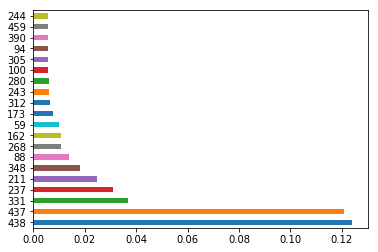

In [39]:
#Top 20 features
feat_importances = pd.Series(rf.feature_importances_, index=X_train_vect.columns.tolist())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[185  58]
 [  8 557]]


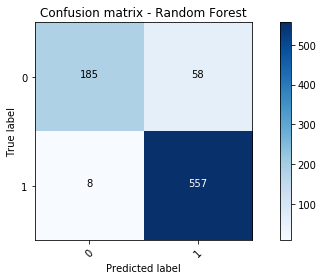

In [40]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Random Forest')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


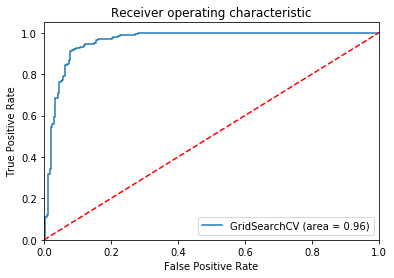

In [41]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_rfc_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [42]:
#gbm using grid search
from sklearn.model_selection import GridSearchCV
gbm = GradientBoostingClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [7, 11, 15]}
grid_gbm_acc = GridSearchCV(gbm, param_grid = grid_values)
grid_gbm_acc.fit(X_train_vect, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 200, 500], 'max_depth': [7, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
grid_gbm_acc.best_params_

{'max_depth': 11, 'n_estimators': 500}

In [44]:
gb = GradientBoostingClassifier(n_estimators=500, max_depth=11)
start = time.time()
gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.9158415841584159
Precision : 0.9219015280135824
Recall : 0.9610619469026549
F1 Score : 0.9410745233968805
Fit time : 0.014458894729614258
Predict time : 0.11569595336914062
Confusion Matrix : 
[[197  46]
 [ 22 543]]


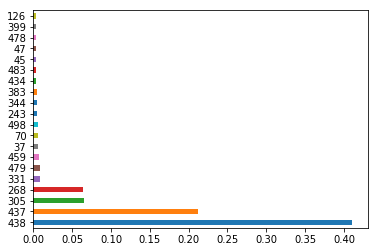

In [45]:
feat_importances = pd.Series(gb.feature_importances_, index=X_train_vect.columns.tolist())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[197  46]
 [ 22 543]]


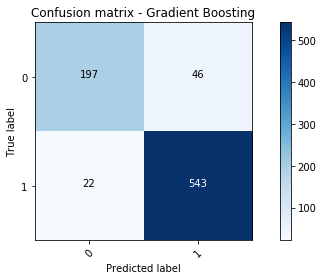

In [46]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


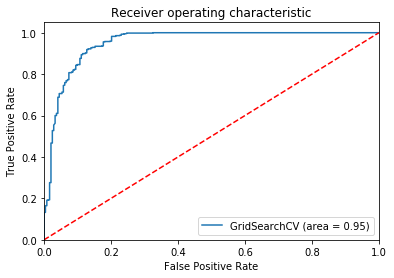

In [47]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_gbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [48]:
#xgbm using grid search
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbm = XGBClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [5, 7, 10]}
grid_xgbm_acc = GridSearchCV(xgbm, param_grid = grid_values)
grid_xgbm_acc.fit(X_train_vect, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 200, 500], 'max_depth': [5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid_xgbm_acc.best_params_

{'max_depth': 10, 'n_estimators': 150}

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=150, max_depth=10)
start = time.time()
xgb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = xgb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.931930693069307
Precision : 0.925
Recall : 0.9823008849557522
F1 Score : 0.9527896995708154
Fit time : 0.023539304733276367
Predict time : 0.11569595336914062
Confusion Matrix : 
[[198  45]
 [ 10 555]]


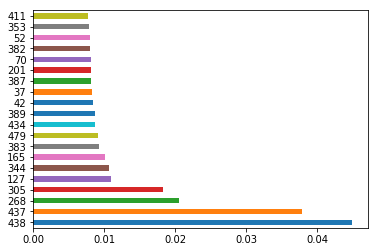

In [51]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train_vect.columns.tolist())
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[198  45]
 [ 10 555]]


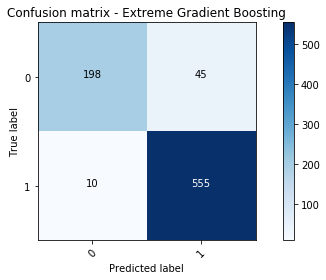

In [52]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Extreme Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


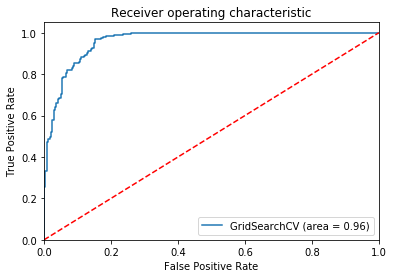

In [53]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_xgbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
#logistic regression grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_vect, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
grid_clf_acc.best_params_

{'C': 1, 'penalty': 'l1'}

In [80]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 1, penalty = 'l1')
start = time.time()
log.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = log.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.9084158415841584
Precision : 0.9032258064516129
Recall : 0.9690346083788707
F1 Score : 0.9349736379613357
Fit time : 0.002189159393310547
Predict time : 0.11569595336914062
Confusion Matrix : 
[[202  57]
 [ 17 532]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
import numpy as np
logmodel = log.fit(X_train_vect, y_train)
coefs=logmodel.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]
#top_three_sorted=top_three[np.argsort(coefs[top_three])]
top_three

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([488, 365, 352, 249, 300, 309, 165,  13, 244, 254, 166, 237, 492,
       104,   5, 441, 440, 382, 217, 273])

Confusion matrix, without normalization
[[187  56]
 [ 12 553]]


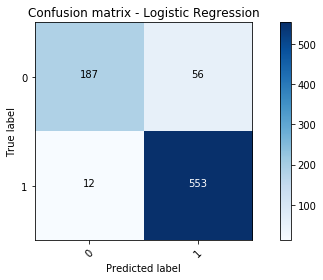

In [58]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Logistic Regression')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

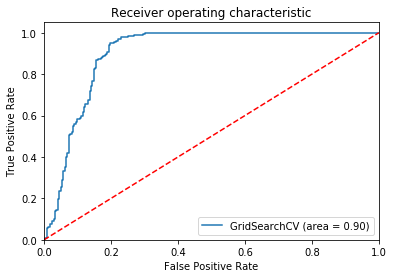

In [59]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_clf_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [26]:
roc_auc

0.8908555827394249

In [89]:
#Using Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#nb = MultinomialNB()

nb = GaussianNB()
start = time.time()
nb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = nb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.75
Precision : 0.7462887989203779
Recall : 0.9753086419753086
F1 Score : 0.845565749235474
Fit time : 0.01425790786743164
Predict time : 0.11569595336914062
Confusion Matrix : 
[[ 53 188]
 [ 14 553]]


In [90]:
pos_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()

print(np.take(tfidf_vect.get_feature_names(), pos_class_prob_sorted[-20:]))

['capit' 'oper' 'longterm' 'weve' 'continu' 'product' 'quarter' 'custom'
 'opportun' 'result' 'prioriti' 'invest' 'execut' 'market' 'busi' 'initi'
 'growth' 'plan' 'strategi' 'strateg']


Confusion matrix, without normalization
[[156  87]
 [128 437]]


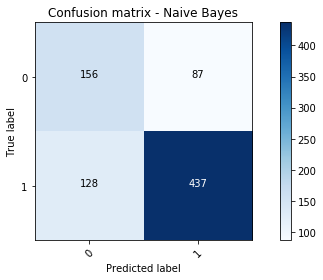

In [62]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Naive Bayes')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

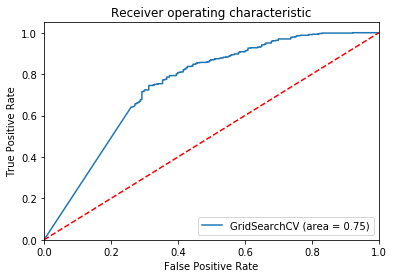

In [63]:
#Plotting ROC curve
from sklearn import metrics
probs = nb.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [64]:
#KNN using grid search
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train_vect, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
grid.best_params_

{'n_neighbors': 26}

In [66]:
#Using K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 26)
start = time.time()
knn.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = knn.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8007425742574258
Precision : 0.8322368421052632
Recall : 0.8955752212389381
F1 Score : 0.8627450980392157
Fit time : 1.9147331714630127
Predict time : 0.11569595336914062
Confusion Matrix : 
[[141 102]
 [ 59 506]]


Confusion matrix, without normalization
[[141 102]
 [ 59 506]]


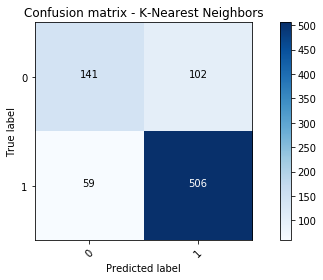

In [67]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - K-Nearest Neighbors')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


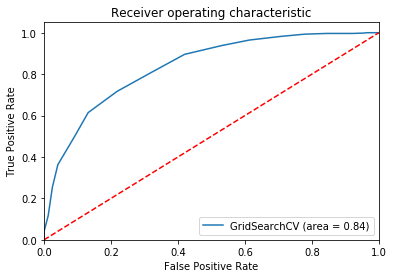

In [68]:
#Plotting ROC curve
from sklearn import metrics
probs = grid.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()